In [7]:
import os
import requests
from pprint import pprint
import json
from datetime import datetime,time, timedelta
import glob
import time
import pandas as pd
import logging
import urllib.request
import logging
import logging.handlers
import boto3
import botocore
import botocore.session
import zipfile

In [8]:
import logging
import logging.handlers

logger=logging.getLogger(__name__)
logger.setLevel(logging.INFO)

logfile1 = time.strftime("%Y-%m-%d_%H_%M_%S"+".log")
print (logfile1)
handler= logging.FileHandler(logfile1)
handler.setLevel(logging.INFO)

formatter= logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.info('hello ')

2017-07-08_07_31_57.log


In [9]:
with zipfile.ZipFile('properties_2016.zip') as zip:
    with zip.open('properties_2016.csv') as myZip:
        a = pd.read_csv(myZip) 

C:\Users\AkilP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [10]:
# a= pd.read_csv('properties_2016.csv')

In [11]:
a.shape

(2985217, 58)

In [12]:
with zipfile.ZipFile('train_2016.zip') as zip:
    with zip.open('train_2016.csv') as myZip:
        b = pd.read_csv(myZip) 

In [13]:
b.shape

(90275, 3)

In [14]:
df= pd.merge(b,a, on='parcelid', how='left')

In [15]:
df.head(2)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN


In [16]:
df.shape

(90275, 60)

In [17]:
df['transactiondate']=pd.to_datetime(df['transactiondate'])

In [18]:
df['MONTH'] = pd.to_datetime(df['transactiondate']).dt.month
df['YEAR']  =   pd.to_datetime(df['transactiondate']).dt.year


In [19]:
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,MONTH,YEAR
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,1,2016
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN,1,2016
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,1,2016
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13,1,2016
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13,1,2016


## Looking at the correlation matrix

In [20]:
correlation =df.corr()

In [21]:
correlation.head()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,MONTH,YEAR
parcelid,1.000000,0.004837,0.588425,-0.047806,0.294147,-0.014073,0.004971,NaN,0.121008,-0.002608,...,0.029649,0.008460,0.003840,NaN,0.001010,-0.030728,0.033895,0.676362,-0.003101,NaN
logerror,0.004837,1.000000,0.005179,-0.004276,0.253395,0.027889,0.025467,NaN,-0.009573,0.029448,...,0.013075,0.022085,0.006508,NaN,-0.003051,-0.006671,-0.012996,0.008892,0.006421,NaN
airconditioningtypeid,0.588425,0.005179,1.000000,-0.154656,NaN,-0.037479,0.075327,NaN,0.008108,-0.034114,...,0.234819,-0.047324,-0.001102,NaN,0.027169,-0.028251,0.076337,0.797531,-0.001306,NaN
architecturalstyletypeid,-0.047806,-0.004276,-0.154656,1.000000,NaN,-0.003398,0.071646,NaN,NaN,-0.003398,...,-0.086010,-0.047364,0.028603,NaN,0.050978,0.020860,NaN,-0.063332,0.174605,NaN
basementsqft,0.294147,0.253395,NaN,NaN,1.000000,0.392206,0.554301,NaN,NaN,0.394347,...,0.437536,0.549054,0.372581,NaN,0.123864,0.406130,NaN,0.142869,-0.156628,NaN


## 1st Cleaning

In [22]:
missing = df.isnull().sum(axis=0).reset_index()
missing.columns = ['name', 'count']
missing = missing.ix[missing['count']>0]
tot=df.shape[0]
missing['ratio']=missing['count'].apply(lambda x:x/tot)
missing = missing.sort_values(by='count')
missing.describe()

C:\Users\AkilP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



,count,ratio
count,47.000000,47.000000
mean,53993.148936,0.598096
std,38173.944886,0.422863
min,1.000000,0.000011
25%,3241.000000,0.035901
50%,72374.000000,0.801706
75%,89092.500000,0.986901
max,90259.000000,0.999823


## Since 75% of the data is below 0.98 we removed all the columns that has ratio greater then 0.986901

In [23]:
missing_columns_removing= missing[(missing['ratio']>0.986901)]
#bedcnt= bedcn[(bedcn['bedroomcnt']>0.5)]

In [24]:
missing_columns_removing

,name,count,ratio
31,pooltypeid10,89114,0.987139
30,poolsizesum,89306,0.989266
11,decktypeid,89617,0.992711
18,finishedsquarefeet6,89854,0.995336
45,typeconstructiontypeid,89976,0.996688
4,architecturalstyletypeid,90014,0.997109
51,fireplaceflag,90053,0.997541
48,yardbuildingsqft26,90180,0.998948
43,storytypeid,90232,0.999524
5,basementsqft,90232,0.999524


In [25]:
df.drop(['pooltypeid10','poolsizesum','decktypeid','finishedsquarefeet6','typeconstructiontypeid','architecturalstyletypeid','fireplaceflag','yardbuildingsqft26','storytypeid','basementsqft','finishedsquarefeet13','buildingclasstypeid'],axis=1, inplace=True)


In [26]:
import numpy as np


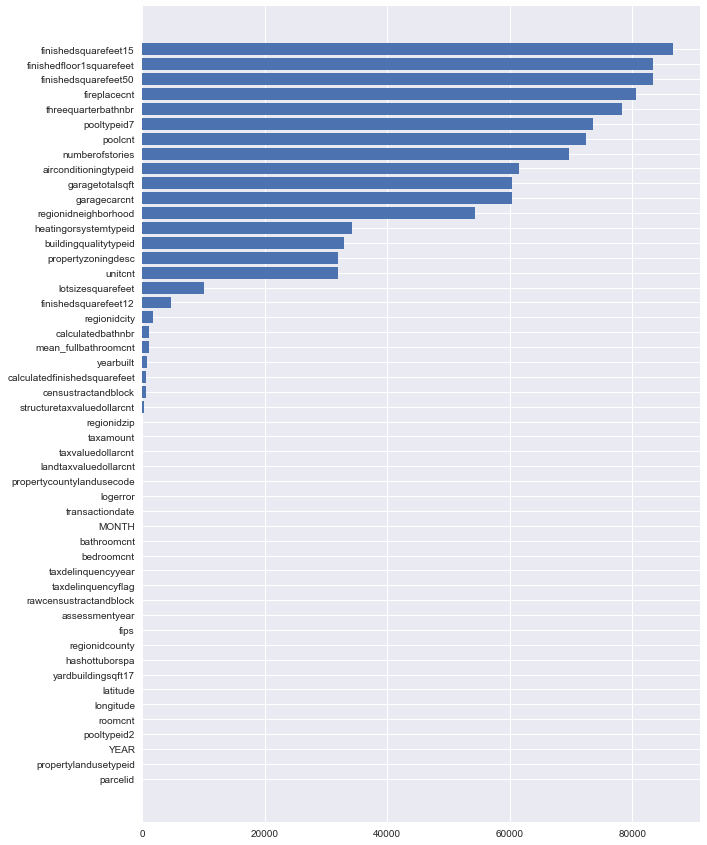

In [77]:
missing_df = pd.DataFrame({'Missing': df.isnull().sum()})
missing_df.sort_values(by="Missing", ascending=True, inplace=True)

a1 = np.arange(missing_df.shape[0])
fig,ax = plt.subplots(figsize=(10,15))
ax.barh(a1, missing_df['Missing'])
ax.set_yticks(a1)
ax.set_yticklabels(missing_df.index)
plt.show()

## 2nd cleaning

In [28]:
pooltypeid2= pd.DataFrame(df['pooltypeid2']).reset_index()

In [29]:
pooltypeid2.describe()

,index,pooltypeid2
count,90275.000000,1204.0
mean,45137.000000,1.0
std,26060.292113,0.0
min,0.000000,1.0
25%,22568.500000,1.0
50%,45137.000000,1.0
75%,67705.500000,1.0
max,90274.000000,1.0


## Since all the values i.e the mean max is 1 in place of NaN we can put 1

In [30]:
df['pooltypeid2']= df['pooltypeid2'].fillna(1)   ## Inserting 1 to the missing values

In [31]:
df.shape

(90275, 50)

## 3rd Cleaning

In [32]:
taxdelin_year= pd.DataFrame(df['taxdelinquencyyear'])

In [33]:
%matplotlib inline

In [34]:
taxdelin_year.describe()

,taxdelinquencyyear
count,1783.000000
mean,13.402692
std,2.715966
min,6.000000
25%,13.000000
50%,14.000000
75%,15.000000
max,99.000000


In [35]:
taxdelin_year.taxdelinquencyyear.unique()

array([ nan,  13.,  15.,  12.,  14.,  10.,   9.,   8.,  11.,   7.,   6.,
        99.])

In [36]:
taxdelin_year.shape

(90275, 1)

## One outlier with value 99. We removed that!

In [37]:
taxdelin_year[(taxdelin_year['taxdelinquencyyear']==99.000000)]

,taxdelinquencyyear
67993,99.0


In [38]:
taxdelin_year=taxdelin_year.fillna(0)
taxdelin_year=pd.DataFrame(taxdelin_year.loc[(taxdelin_year['taxdelinquencyyear']<98.000000) ])


In [39]:
taxdelin_year.taxdelinquencyyear.unique()

# taxdelin_year.describe()

array([  0.,  13.,  15.,  12.,  14.,  10.,   9.,   8.,  11.,   7.,   6.])

In [40]:
taxdelin_year_corr= pd.DataFrame(correlation['taxdelinquencyyear']).reset_index()
taxdelin_year_corr

,index,taxdelinquencyyear
0,parcelid,0.033895
1,logerror,-0.012996
2,airconditioningtypeid,0.076337
3,architecturalstyletypeid,NaN
4,basementsqft,NaN
5,bathroomcnt,0.046710
6,bedroomcnt,0.023705
7,buildingclasstypeid,NaN
8,buildingqualitytypeid,-0.007968
9,calculatedbathnbr,0.046273


In [41]:
taxdelin_year = taxdelin_year.replace(0, np.NaN)


In [42]:

mean_taxdelin_year= taxdelin_year['taxdelinquencyyear'].mean()
taxdelin_year['taxdelinquencyyear']=taxdelin_year.taxdelinquencyyear.mask(taxdelin_year.taxdelinquencyyear.isnull(), mean_taxdelin_year)
taxdelin_year.taxdelinquencyyear.describe()

count    90274.000000
mean        13.354658
std          0.253778
min          6.000000
25%         13.354658
50%         13.354658
75%         13.354658
max         15.000000
Name: taxdelinquencyyear, dtype: float64

### Changing the above values onto the main dataframe


In [43]:
df['taxdelinquencyyear']=pd.DataFrame(df['taxdelinquencyyear']).fillna(0)


In [44]:
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,MONTH,YEAR
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,2.0,NaN,1684.0,...,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,0.0,6.037107e+13,1,2016
1,14366692,-0.1684,2016-01-01,NaN,3.5,4.0,NaN,3.5,NaN,2263.0,...,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,0.0,NaN,1,2016
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,3.0,NaN,2217.0,...,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,0.0,6.037464e+13,1,2016
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,2.0,NaN,839.0,...,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,0.0,6.037296e+13,1,2016
4,14432541,-0.0050,2016-01-02,NaN,2.5,4.0,NaN,2.5,NaN,2283.0,...,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,0.0,6.059042e+13,1,2016


In [45]:
df=(df.loc[(df['taxdelinquencyyear']<98.000000) ])



In [46]:
df['taxdelinquencyyear'] = pd.DataFrame(df['taxdelinquencyyear'].replace(0, np.NaN))


mean_taxdelin_year= df['taxdelinquencyyear'].mean(skipna=True)

df['taxdelinquencyyear'] =pd.DataFrame(df.taxdelinquencyyear.mask(df.taxdelinquencyyear.isnull(), mean_taxdelin_year))


In [47]:

df.shape

(90274, 50)

### Cleaning 4

In [48]:
taxdelin_flag= pd.DataFrame(df['taxdelinquencyflag'])

In [49]:
taxdelin_flag.taxdelinquencyflag.unique()

array([nan, 'Y'], dtype=object)

In [50]:
taxdelin_flag.describe()

,taxdelinquencyflag
count,1782
unique,1
top,Y
freq,1782


### Since we can't figure out its correlation and it only has one unique value we can just put in 0

In [51]:
df['taxdelinquencyflag']=pd.DataFrame(df['taxdelinquencyflag']).fillna(0)

In [52]:
df.shape

(90274, 50)

## 5th Cleaning

In [53]:
hashtutto= pd.DataFrame(df['hashottuborspa'])

In [54]:
hashtutto.hashottuborspa.unique()

array([nan, True], dtype=object)

In [55]:
hashtutto.describe()

,hashottuborspa
count,2365
unique,1
top,True
freq,2365


In [56]:
df['hashottuborspa']=pd.DataFrame(df['hashottuborspa']).fillna(0)

In [57]:
df.shape

(90274, 50)

## 6th Cleaning

In [58]:
yardbuilding= pd.DataFrame(df['yardbuildingsqft17'])

In [59]:
yardbuilding.describe()

,yardbuildingsqft17
count,2646.000000
mean,310.142101
std,216.721869
min,25.000000
25%,180.000000
50%,259.500000
75%,384.000000
max,2678.000000


In [60]:
yardbuilding_corr= pd.DataFrame(correlation['yardbuildingsqft17']).reset_index()
yardbuilding_corr[(yardbuilding_corr['yardbuildingsqft17']>0.3)]

,index,yardbuildingsqft17
11,finishedfloor1squarefeet,0.369195
12,calculatedfinishedsquarefeet,0.339667
13,finishedsquarefeet12,0.339691
15,finishedsquarefeet15,1.000000
16,finishedsquarefeet50,0.356371
22,garagetotalsqft,0.369438
28,poolsizesum,0.321044
38,roomcnt,0.305769
43,yardbuildingsqft17,1.000000
47,structuretaxvaluedollarcnt,0.316902


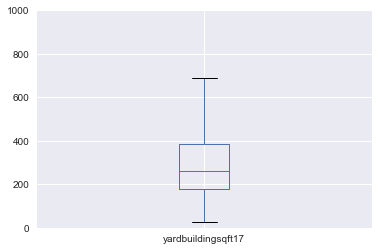

In [61]:
yardbuilding.plot(kind='box',ylim=(0,1000))

## inserting Mean values 

In [62]:
df['yardbuildingsqft17'] = pd.DataFrame(df['yardbuildingsqft17'].replace(0, np.NaN))


mean_yard17= df['yardbuildingsqft17'].mean(skipna=True)

df['yardbuildingsqft17'] =pd.DataFrame(df.yardbuildingsqft17.mask(df.yardbuildingsqft17.isnull(), mean_yard17))

## 7th Cleaning


In [63]:
fullbathcnt= pd.DataFrame(df['fullbathcnt'])
fullbathcnt.fullbathcnt.unique()

array([  2.,   3.,   4.,   1.,   5.,   8.,  nan,   9.,   7.,   6.,  10.,
        12.,  11.,  20.,  15.])

In [64]:
fullbathcnt.describe()

,fullbathcnt
count,89092.000000
mean,2.241245
std,0.963138
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,20.000000


In [65]:
fullbathcnt_corr= pd.DataFrame(correlation['fullbathcnt']).reset_index()
fullbathcnt_corr[(fullbathcnt_corr['fullbathcnt']>0.7)]

,index,fullbathcnt
5,bathroomcnt,0.984130
9,calculatedbathnbr,0.984130
12,calculatedfinishedsquarefeet,0.780325
13,finishedsquarefeet12,0.782956
15,finishedsquarefeet15,0.700618
17,finishedsquarefeet6,0.763129
20,fullbathcnt,1.000000


In [66]:
df['mean_fullbathroomcnt']= (df['bathroomcnt']+df['calculatedbathnbr'])/2.000000

In [67]:
abc= df[['mean_fullbathroomcnt','fullbathcnt']]

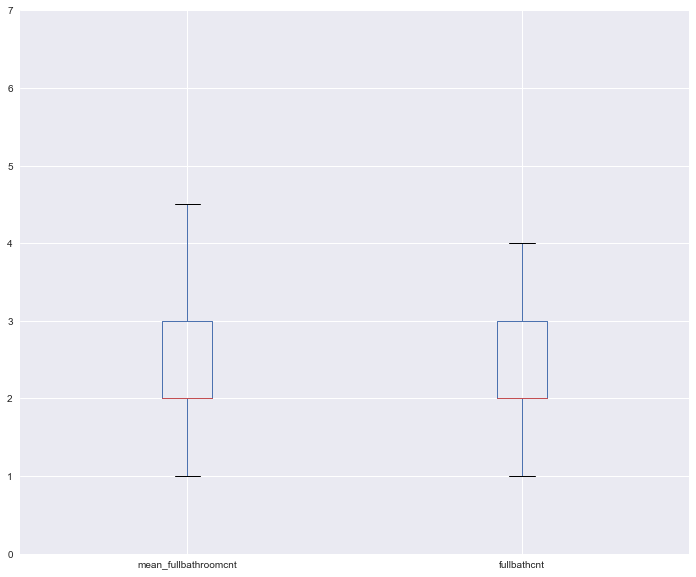

In [68]:
abc.plot(kind='box',ylim=(0,7),figsize=(12,10))

## So, We will drop the full bath count column and use mean_fullbathroomcnt in place of it

In [69]:

df.drop(['fullbathcnt'],axis=1, inplace=True)

## Inserting 0 in missing values of latittude and Longitudes

In [70]:
df['latitude']=pd.DataFrame(df['latitude']).fillna(0)
df['longitude']=pd.DataFrame(df['longitude']).fillna(0)

In [71]:
df.to_csv('Clean_Data.csv')

In [72]:
logger.info('Reading Json')
with open('intial_config.json') as data_file:    
    data = json.load(data_file)


In [73]:
import boto3
s3 = boto3.resource(
    's3',
    aws_access_key_id=data["AWSAccess"],
    aws_secret_access_key=data["AWSSecret"])

client= boto3.client('s3', 
                     aws_access_key_id=data["AWSAccess"],
                    aws_secret_access_key=data["AWSSecret"])

In [74]:
names=[]
response = client.list_buckets()
for bucket in response["Buckets"]:
    names.append(bucket)

Bucketname= 'adsassign2_databucket1'
if Bucketname in names:
    print('it exists')
else:
    s3.create_bucket(Bucket=Bucketname)  

In [75]:
uploadFileNames = []

for filename in glob.glob("Clean_Data.csv"):
    uploadFileNames.append(filename)
    print(filename)

Clean_Data.csv


In [76]:
import botocore.session
for files in uploadFileNames:
    try:
        s3.Object('adsassign2_databucket1', files).load()
    except botocore.exceptions.ClientError as e:
        if e.response['Error']['Code'] == "404":
            s3.Object("adsassign2_databucket1", files).put(Body=open(files, 'rb'))
            print(files+' uploaded')
            break
        else:
            raise
    else:
        exists = True

    print(files+''+' exists')
        

Clean_Data.csv exists
